In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('./Melbourne_housing_FULL.csv')
# dataset.head()

In [4]:
# dataset.nunique()

In [5]:
dataset.shape

(34857, 21)

In [6]:
#cols_to_use = ['Suburb','Rooms','Type','Method','SellerG','Regionname','Propertycount', 
#               'Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize','BuildingArea', 'Price']
cols_to_use = ['Price','Landsize','BuildingArea','Distance','Rooms','Bedroom2','Bathroom','Car',
               'Suburb','Type','Method']
dataset = dataset[cols_to_use]
dataset.head()
dataset.shape

(34857, 11)

In [7]:
dataset.isna().sum()

Price            7610
Landsize        11810
BuildingArea    21115
Distance            1
Rooms               0
Bedroom2         8217
Bathroom         8226
Car              8728
Suburb              0
Type                0
Method              0
dtype: int64

In [8]:
# cols_to_fill_zero = ['Propertycount','Distance','Bedroom2','Bathroom','Car']
cols_to_fill_zero = ['Distance','Bedroom2','Bathroom','Car']

dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)
dataset.isna().sum()

Price            7610
Landsize        11810
BuildingArea    21115
Distance            0
Rooms               0
Bedroom2            0
Bathroom            0
Car                 0
Suburb              0
Type                0
Method              0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

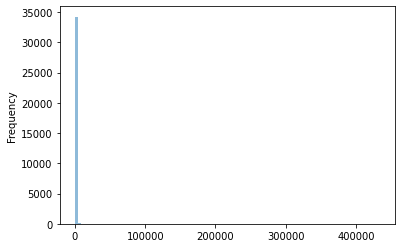

In [9]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['Landsize'] = dataset['Landsize'].   replace(0,dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())
dataset[dataset["Rooms"   ] >= 8] = np.nan
dataset[dataset["Bedroom2"] >= 8] = np.nan
dataset[dataset["Bathroom"] >= 5] = np.nan
dataset[dataset["Car"     ] >= 5] = np.nan
dataset.isna().sum()

dataset['Landsize'].plot.hist(bins=100, alpha=0.5)

In [10]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Price           0
Landsize        0
BuildingArea    0
Distance        0
Rooms           0
Bedroom2        0
Bathroom        0
Car             0
Suburb          0
Type            0
Method          0
dtype: int64

In [11]:

dataset = pd.get_dummies(dataset,drop_first=True)
dataset.head()


,Price,Landsize,BuildingArea,Distance,Rooms,Bedroom2,Bathroom,Car,Suburb_Aberfeldie,Suburb_Airport West,...,Suburb_Yarra Glen,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
1,1480000.0,202.0,160.2564,2.5,2.0,2.0,1.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1035000.0,156.0,79.0000,2.5,2.0,2.0,1.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1465000.0,134.0,150.0000,2.5,3.0,3.0,2.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,850000.0,94.0,160.2564,2.5,3.0,3.0,2.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1600000.0,120.0,142.0000,2.5,4.0,3.0,1.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
dataset.to_csv('myDataFrame.csv')

In [13]:
X = dataset.drop('Price', axis = 1)
y = dataset['Price']

In [14]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)
print(reg.score(train_X, train_y))
print(reg.score(test_X, test_y))
print(reg.coef_.shape, train_X.shape)

0.6629951523152574
0.6596712636874571
(355,) (18835, 355)


In [16]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 65, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)
print(lasso_reg.score(train_X, train_y))
print(lasso_reg.score(test_X, test_y))
print(lasso_reg.coef_.shape, train_X.shape )

0.6598332844977806
0.657590151360335
(355,) (18835, 355)


In [17]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=10, solver="cholesky",max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)
print(ridge_reg.score(train_X, train_y))
print(ridge_reg.score(test_X, test_y))
print(ridge_reg.coef_.shape, train_X.shape )

0.6556782542076469
0.6535839291495502
(355,) (18835, 355)


In [18]:
from sklearn.linear_model import ElasticNet
elastic_net_reg = ElasticNet(alpha=.001, l1_ratio=.1)
elastic_net_reg.fit(train_X, train_y)
print(elastic_net_reg.score(train_X, train_y))
print(elastic_net_reg.score(test_X, test_y))
print(elastic_net_reg.coef_.shape, train_X.shape )

0.6493878565402558
0.6466919756011028
(355,) (18835, 355)


In [30]:
X_new = test_X[:3]
y_new = lasso_reg.predict(X_new)
print(test_y[:3])
print(y_new)

2166     600000.0
7685     815000.0
14057    812000.0
Name: Price, dtype: float64
[ 503010.16136308  930929.53833864 1193079.96811514]


In [24]:
test_y.head()

2166      600000.0
7685      815000.0
14057     812000.0
21459    1960000.0
1488     1185000.0
Name: Price, dtype: float64